In [1]:
# 📦 Импорт библиотек
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import joblib
import matplotlib.pyplot as plt


In [2]:
# 📥 Загрузка данных
df = pd.read_csv("/tmp/transformed.csv")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species,petal_length_norm
0,5.1,3.5,1.4,0.2,setosa,0.202899
1,4.9,3.0,1.4,0.2,setosa,0.202899
2,4.7,3.2,1.3,0.2,setosa,0.188406
3,4.6,3.1,1.5,0.2,setosa,0.217391
4,5.0,3.6,1.4,0.2,setosa,0.202899


In [3]:
# 🎯 Подготовка признаков и целевой переменной
X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = df["species"]


In [4]:
# 🔀 Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [5]:
# 🧠 Обучение модели логистической регрессии
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [6]:
# 💾 Сохранение модели
joblib.dump(model, "/tmp/model.joblib")
print("✅ Model trained and saved to /tmp/model.joblib")


✅ Model trained and saved to /tmp/model.joblib


In [7]:
# 🔎 Предсказания на тестовой выборке
y_pred = model.predict(X_test)


In [8]:
# 📊 Accuracy и Classification Report
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy: {accuracy:.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


🎯 Accuracy: 0.9667

📋 Classification Report:
              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        10
  versicolor     1.0000    0.9000    0.9474        10
   virginica     0.9091    1.0000    0.9524        10

    accuracy                         0.9667        30
   macro avg     0.9697    0.9667    0.9666        30
weighted avg     0.9697    0.9667    0.9666        30



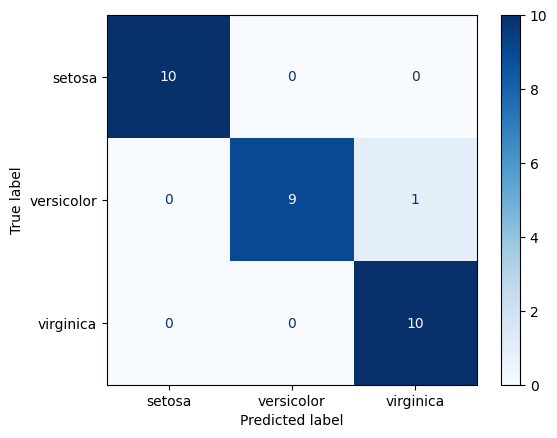

In [9]:
# 🧱 Матрица ошибок с визуализацией
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
